# Aufgabe 34: Kolmogorow–Smirnow-Test 

### a) Welche Werte müssen Sie für 𝜇 und 𝜎 einer Gauß-Verteilung wählen, damit sie einer Poisson-Verteilung mit Erwartungswert 𝜆 möglichst ähnlich ist?


Es muss gelten: $$ \mu = \lambda, \\
\sigma = \sqrt{\lambda}. $$

### b)  Implementieren Sie den Kolmogorow–Smirnow-Test für gebinnte Daten.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def KS_Zweistichprobentest(X, Y, alpha, lambdasch):
    
    bins = np.linspace(lambdasch - 5*np.sqrt(lambdasch), lambdasch + 5*np.sqrt(lambdasch), 101)
    hist_X = np.histogram(X, bins=bins, density=True)[0]
    hist_Y = np.histogram(Y, bins= bins, density=True)[0]
    
    S_X = np.cumsum(hist_X*(bins[1]-bins[0])) #CDF, entspricht \int f(x)dx
    S_Y = np.cumsum(hist_Y*(bins[1]-bins[0])) 
    
    d_max = max(np.abs(S_X - S_Y))
    K_alpha = np.sqrt( np.log(2/alpha)/2 )
    HS = np.sqrt( len(X)*len(Y) / (len(X) + len(Y)) )*d_max
    if HS > K_alpha:
        return False
    else:
        return True

In [3]:
def KS_Gauss_Poisson(lambdasch, alpha, length):
    np.random.seed(42)
    gauss = np.random.normal(lambdasch, np.sqrt(lambdasch), length).round(0)
    poisson = np.random.poisson(lambdasch, length)
    return KS_Zweistichprobentest(gauss, poisson, alpha, lambdasch)

### c)

In [4]:
lambdasch = 1
Alpha = 5e-2
while not KS_Gauss_Poisson(lambdasch, Alpha, 10000):
    lambdasch += 1
print('Herzlichen Glückwunsch, du Hurensohn!!! \nAb etwa Lambda = {} stimmen die Verteilungen für alpha = {} überein.'.format(lambdasch, Alpha))

Herzlichen Glückwunsch, du Hurensohn!!! 
Ab etwa Lambda = 9 stimmen die Verteilungen für alpha = 0.05 überein.


Das heißt also:  
Wir lehnen die Hypothese, dass die beiden Verteilungen gleich sind, bis einschließlich $\lambda = 51$ mit einer Signifikanz (Typ-I-Fehlerrate) von 5% ab.

### d) 

In [5]:
lambdasch = 1
Alpha = 2.5e-2
while not KS_Gauss_Poisson(lambdasch, Alpha, 10000):
    lambdasch += 1
print('Ab etwa Lambda = {} stimmen die Verteilungen für alpha = {} überein.'.format(lambdasch, Alpha))

Ab etwa Lambda = 6 stimmen die Verteilungen für alpha = 0.025 überein.


In [6]:
lambdasch = 1
Alpha = 0.1e-2
while not KS_Gauss_Poisson(lambdasch, Alpha, 10000):
    lambdasch += 1
print('Ab etwa Lambda = {} stimmen die Verteilungen für alpha = {} überein.'.format(lambdasch, Alpha))

Ab etwa Lambda = 4 stimmen die Verteilungen für alpha = 0.001 überein.


Bei kleinerer Signifikanz lehnen wir den Test also schon für kleinere $\lambda$ nicht mehr ab.  
Achtung: Das heißt nicht, dass sich die Gauß- und die Poisson-Verteilung für kleinere $\lambda$ weniger unterscheiden, was auch an den folgenden Plots gesehen werden kann.  
Grund des schnelleren Annehmens der Nullhypothese bei kleinerer Signifikanz ist, dass es sich hier um einen Verwerfungstest mit vorgegebener Signifikanz handelt.

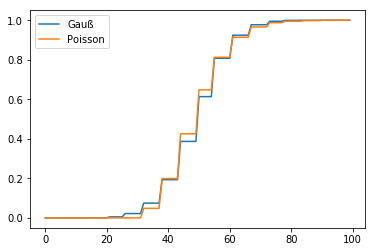

In [9]:
lambdasch = 3
length = 10000

np.random.seed(42)
gauss = np.random.normal(lambdasch, np.sqrt(lambdasch), length).round(0)
poisson = np.random.poisson(lambdasch, length)

bins = np.linspace(lambdasch - 5*np.sqrt(lambdasch), lambdasch + 5*np.sqrt(lambdasch), 101)
hist_X = np.histogram(gauss, bins=bins, density=True)[0]
hist_Y = np.histogram(poisson, bins= bins, density=True)[0]

S_X = np.cumsum(hist_X*(bins[1]-bins[0])) #CDF
S_Y = np.cumsum(hist_Y*(bins[1]-bins[0])) #CDF

plt.plot(S_X, label='Gauß')
plt.plot(S_Y, label='Poisson')
plt.legend()

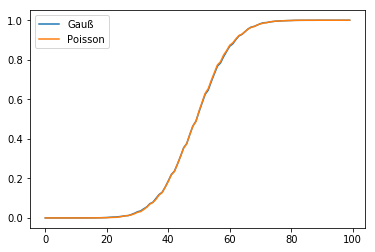

In [10]:
lambdasch = 300

np.random.seed(42)
gauss = np.random.normal(lambdasch, np.sqrt(lambdasch), length).round(0)
poisson = np.random.poisson(lambdasch, length)

bins = np.linspace(lambdasch - 5*np.sqrt(lambdasch), lambdasch + 5*np.sqrt(lambdasch), 101)
hist_X = np.histogram(gauss, bins=bins, density=True)[0]
hist_Y = np.histogram(poisson, bins= bins, density=True)[0]

S_X = np.cumsum(hist_X*(bins[1]-bins[0])) #CDF
S_Y = np.cumsum(hist_Y*(bins[1]-bins[0])) #CDF

plt.plot(S_X, label='Gauß')
plt.plot(S_Y, label='Poisson')
plt.legend()